In [18]:
from collections import defaultdict 

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Next word predictions for 'bhai': {'kaise': 0.125, 'tum': 0.125, 'kahan': 0.125}
Next word predictions for 'ho': {'bhai': 1.0}
Next word predictions for 'gaya': {'tha': 1.0}
Next word predictions for 'boy': {'<UNK>': 1.0}


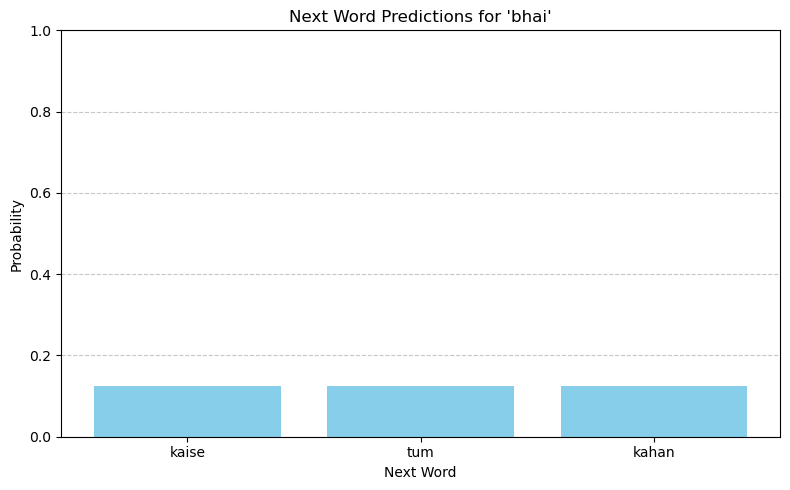

In [22]:
from collections import defaultdict

# 🔹 Step 1: Add more training data
data = """
    ha bhai kaise ho bhai tum aaj ache lag rahe ho 
    bhai kahan ja rahe ho bhai ka mood accha hai
    bhai ne chai pi hai bhai hamesha mast rehta hai 
    kal bhai bazar gaya tha aur phir bhai ghar aaya
""".split()

# 🔹 Step 2: Build bigram counts
counts = defaultdict(lambda: defaultdict(int))
for i in range(len(data) - 1):
    counts[data[i]][data[i + 1]] += 1

# 🔹 Step 3: Prediction function with graceful fallback
def predict_next(word, top_k=3):
    if word not in counts:
        return {"<UNK>": 1.0}  # unknown word fallback
    
    total = sum(counts[word].values())
    probs = {w: c / total for w, c in counts[word].items()}
    
    # Return top_k predictions (sorted by highest probability)
    return dict(sorted(probs.items(), key=lambda item: item[1], reverse=True)[:top_k])

# 🔹 Test Predictions
print("Next word predictions for 'bhai':", predict_next("bhai"))
print("Next word predictions for 'ho':", predict_next("ho"))
print("Next word predictions for 'gaya':", predict_next("gaya"))
print("Next word predictions for 'boy':", predict_next("boy"))  # unknown
 # visualiing prediction for selected words 
target_word="bhai"
predictions=predict_next(target_word)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(predictions.keys(), predictions.values(), color='skyblue')
plt.title(f"Next Word Predictions for '{target_word}'")
plt.xlabel("Next Word")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
